<a href="https://colab.research.google.com/github/EvgenyEsin/A-B_test/blob/main/A_B_test_DZ_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Задача:** На основе выбранных продуктов из первого вебинара, выберите 2 A/B-теста и составьте план эксперимента, чтобы избежать Peeking Problem. Распишите, какие метрики и как вы будете анализировать

Продукт https://www.citilink.ru/

Гипотеза 1. Если ввести скидку на товары из корзины, это позволит увеличить прибыль, так как повысится конверсия в покупку и снизится процент отказа от корзины.


Этап 1. Планирование эксперимента. Анализ рынка. Зачастую пользователи скапливают в своей корзине на маркетплейсе большое количество товаров, но не оформляет покупку по различным причинам. Данная гипотеза решает проблему продажи отложенных товаров, которые пользователи добавили в корзину, но не приобрели за определенный период времени. Одним из решений может стать предоставоение скидки на всю корзину.

Выбор метрик и прогноз их изменений. Приоритетом в данном эксперименте станут следующие метрики:
1. Конверсия в покупку (прогноз + 20%).
2. Количество добавленных в корзину товаров (прогноз + 5%).

Добавочные метрики (что не хотим уронить?):
1. Процент отказа от корзины (не выше 2% от исходного).
2. Время обработки заказа (не выше 5% от исходного).

Что делаем:

1. Рассчитаем количество пользователей для запуска эксперимента. Исходные данные: конверсия в покупку до эксперимента - 1,2%, ожидаемая конверсия - 1,4%. Достоверность 95%, мощность теста 80%. Для рассчета используем калькулятор размера выборки.

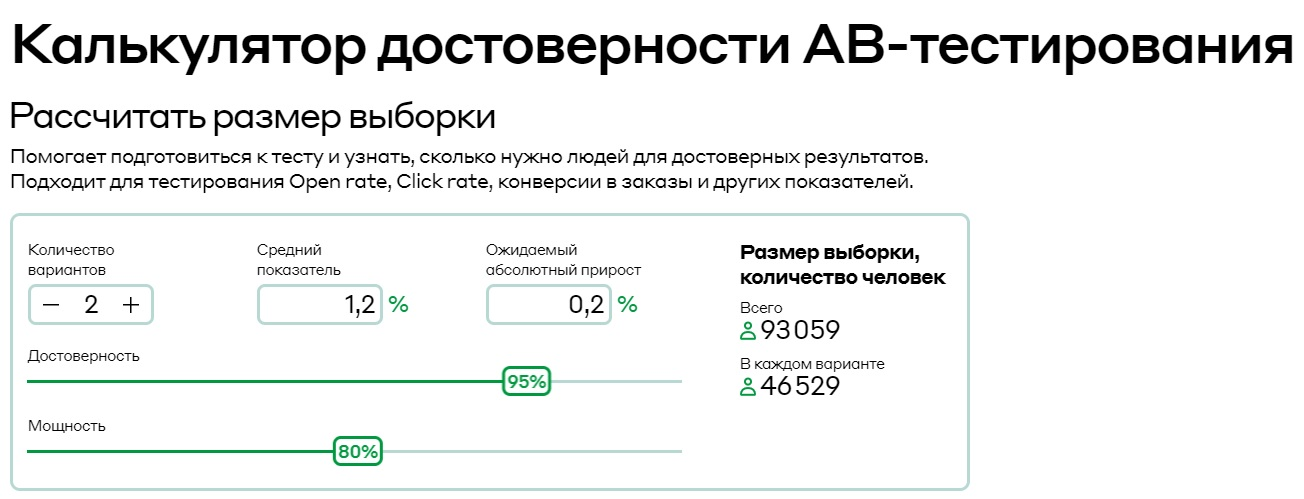

2. Рассчитаем количество дней для проведения эксперимента. Согласно статистике, приведенной на сайте https://parsesite.ru/ru/cost/citilink.ru, количество ежедневных уникальных посетителей сосавляет 33000. Таким образом, количество дней для проведения эксперимента составит:

In [1]:
user_test = 93059
user_day = 33000
N = (user_test/user_day)
N

2.819969696969697

Как видим, для проведения эксперимента достаточно 3 дня. Но это без учета онка конверсии. Для полноценного провдения эксперимента необходимо учесть, что тестирование гипотезы будет проводиться на новых пользавателях, которые осуществили заказ из корзины с отложенным сроком. Так как при рассчете конверсии в покупку на сайте первоначально установлен период 14 дней, установим срок ожидания конверсии в покупку 2 недели (14 дней), после чего будем предоставлять тестовой группе пользователей скидку 10% на весь товар из корзины. Контрольная группа пользавателей останется без скидки. Еще 3 дня понадобится для совершения покупки пользователями обеих групп после окончания основного периода эксперимента (учитывая возможные выходные дни).
Таким образом, рассчетная продолжительность эксперимента составит 20 дней.

Способом реализации данного эксперимента станет оповещение пользавателей, неоплативших свой товар из корзины в течении 14 дней и более, посредством СМС, email - рассылки и указанием размера ссылки непосредственно на странице сайта в разделе "корзина".



Этап 2. Запуск теста. С первого дня теста будем создавать базу данных пользователей, добавивших товар в корзину без совершения оплаты. Начиная с 15 дня начинаем основной период эксперимента: отсечем тех пользователей, которые оплатили товар. Оставшихся разделим на тестовую (В) и контрольную (А) группы. Тестовой группе покупателей предложим скидку 10% на все товары из корзины. Так будем делать ежедневно, добавляя в обе группы пользователей с отложенным товаром более 14 дней, пока не наберем в каждой группе по рассчитанному ранее количеству пользователей, то есть по 46 529. Согласно предварительным рассчетам, заданное количество пользователей должно набраться за 3 дня основного периода эксперимента. Далее с 18 дня в течении еще 3-х дополнительных дней будем наблюдать за конверсией в покупку в обоих группах, но уже не добавляя туда новых пользователей. В конце эксперимента сосчитаем, сколько пользователей воспользовались предложением со скидкой в тестовой группе и сколько пользователей совершили свои отложенные покупки в контрльной группе.

Для наглядности рассмотрим начало эксперимента 1-го числа месяца. Запоминаем пользователей, добавивших товар в корзину 1-го числа. Затем 15-го числа (спустя 14 дней) из пользователей, добавивших товар в корзину 1-го числа уберем тех, кто оплатил товар. Остальных разделим пополам на тест и контроль. Тестируемым предложим скидку и обе группы поместим в наше наблюдение еще на 3 дня для принития ими решения о покупке. Итоги группы 1-го числа подведем 18-го числа. То же самое будем делать с группой 2-го и 3-го числа. Их итоги подведем соответственно 19-го и 20-го числа. В случае, если мы не наберем нужного количества пользователей, то эксперимент продолжим до необходимого количества дней, то есть будем проводить эксперимент ежедневно и на 4-е число и т.д.

По ходу проведения эксперимента будем вести мониторинг статистики по указанным метрикам.


Этап 3. Анализ результатов теста. По окончании теста для анализа результатов воспользуемся калькулятором:

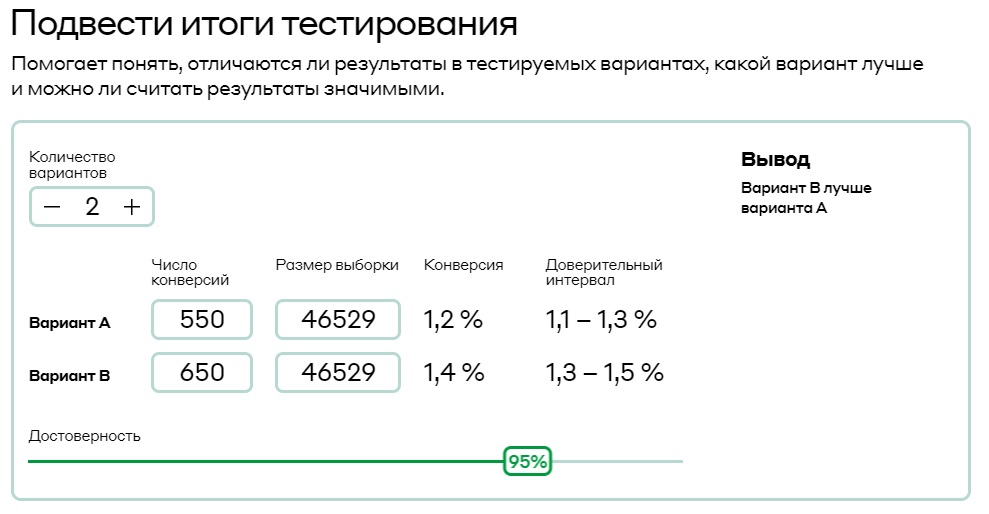

Этап 4. Принатие решения. Исходя из вышеуказанного вывода о том, что вариант В лучше, оценив поведение добавочных метрик, принимаем решение рекомендовать устанавливать скидку 10% на товар в корзине, если его покупка отсрочена на 14 дней и более.

PS. На рассмотрение второго А/В теста не хватило сил...